In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

----
## INHOUD:

* [FFT](#Fast_Fourier_Transform)
    
----    

## Fast Fourier Transform

- Een goede uitleg is [hier](http://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/) gegeven

![Fourier Explained](figures/fourier.gif)

![Fourier Explained 2](figures/fourier2.gif)

### Voorbeeld:

<IPython.core.display.Javascript object>


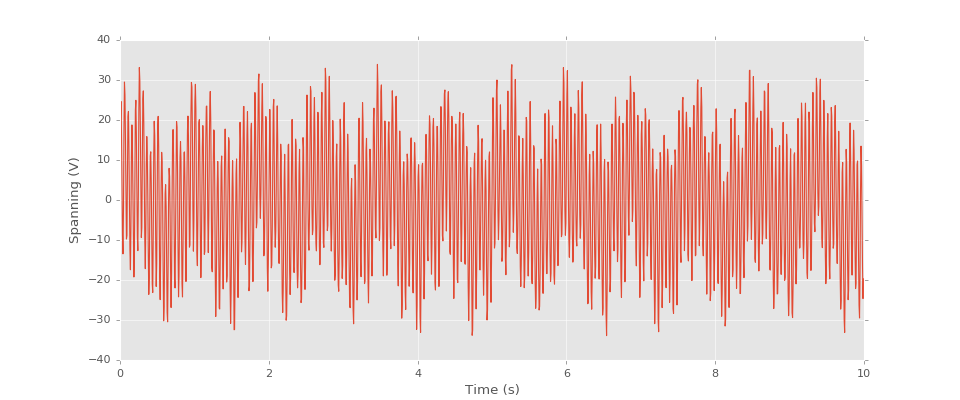

In [2]:
Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval ()
t = np.arange(0,10,Ts) # time vector

f0 = np.array([5, 16, 4.4, 40.3, 1.2, 770]) #frequencies
phi = np.array([0, 0, 0, 0, 0, 0]) #phases
A = np.array([1, 2, 6, 2, 7, 20]) #amplitudes

y = sum([A_i*np.sin(2*np.pi*f0_i*t+phi_i) for f0_i,A_i,phi_i in zip(f0,A,phi)])

plt.figure(figsize=(12,5))
plt.plot(t,y)
plt.xlabel('Time (s)')
plt.ylabel('Spanning (V)')

<IPython.core.display.Javascript object>


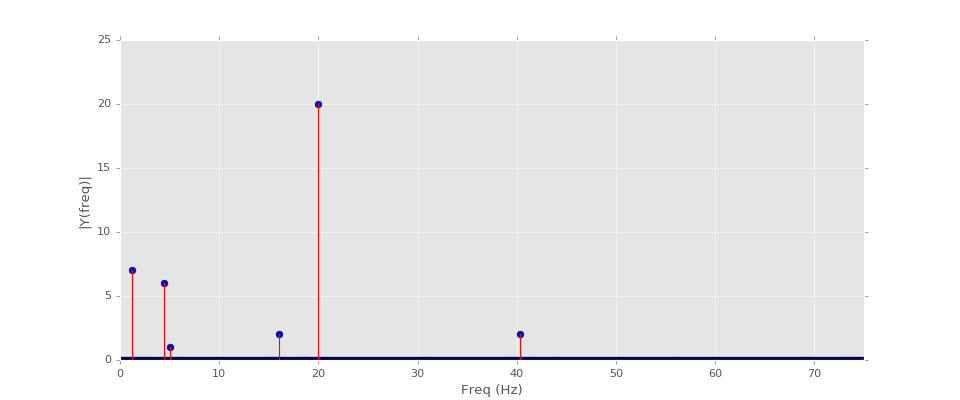

(0, 75.0)

In [3]:
n = len(y) # length of the signal
k = np.arange(n) # 0.. 1 .. 2 .. .. n
T = n/Fs #frequency resolution

frq_sided = np.linspace(0,Fs,)

frq_2sided = k/T # two sided frequency range
frq_1sided = frq_2sided[range(int(n/2))] # one side frequency range

Y = np.fft.fft(y)
Y_normalised = Y/n # fft computing and normalization, divided over both pos and neg frequencies
Y_1sided = 2*Y_normalised[range(int(n/2))]

mag = abs(Y_1sided) #take magnitude of complex fft signal


plt.figure(figsize=(12,5))
plt.stem(frq_1sided,abs(Y_1sided),'r') # plotting the spectrum
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')
plt.xlim((0,Fs/2))

In [4]:
#print(f0)
#print(A)